In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import plotly.graph_objects as go
import plotly.express as px

In [101]:
data_apr_14 = pd.read_csv('uber-raw-data-apr14.csv')
data_aug_14 = pd.read_csv('uber-raw-data-aug14.csv')
data_jul_14 = pd.read_csv('uber-raw-data-jul14.csv')
data_jun_14 = pd.read_csv('uber-raw-data-jun14.csv')
data_may_14 = pd.read_csv('uber-raw-data-may14.csv')
data_sep_14 = pd.read_csv('uber-raw-data-sep14.csv')

In [102]:
sets = [data_apr_14,data_aug_14,data_jul_14,data_jun_14,data_may_14,data_sep_14]
data = pd.concat(sets)

In [103]:
data.head()

Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512

In [104]:
data['Time'] = data['Date/Time'].apply(lambda x : x.split(' ')[1])

In [105]:
data['Hours'] = data['Time'].apply(lambda x : x.split(':')[0]).astype(str)

In [106]:
data['Minutes'] = data['Time'].apply(lambda x : x.split(':')[1]).astype(str)

In [107]:
data['Date'] = data['Date/Time'].apply(lambda x : x.split(' ')[0])

In [108]:
data['Day'] = data['Date/Time'].apply(lambda x : x.split('/')[1]).astype(str)

### Now we look see if the data which we have matches with the general human behaviour that is travelling less at mid night and dawn than day time. We expect to see low bookings during during mid night and dawn. 

## Overall Bookings Done Per Hours in 6 months span

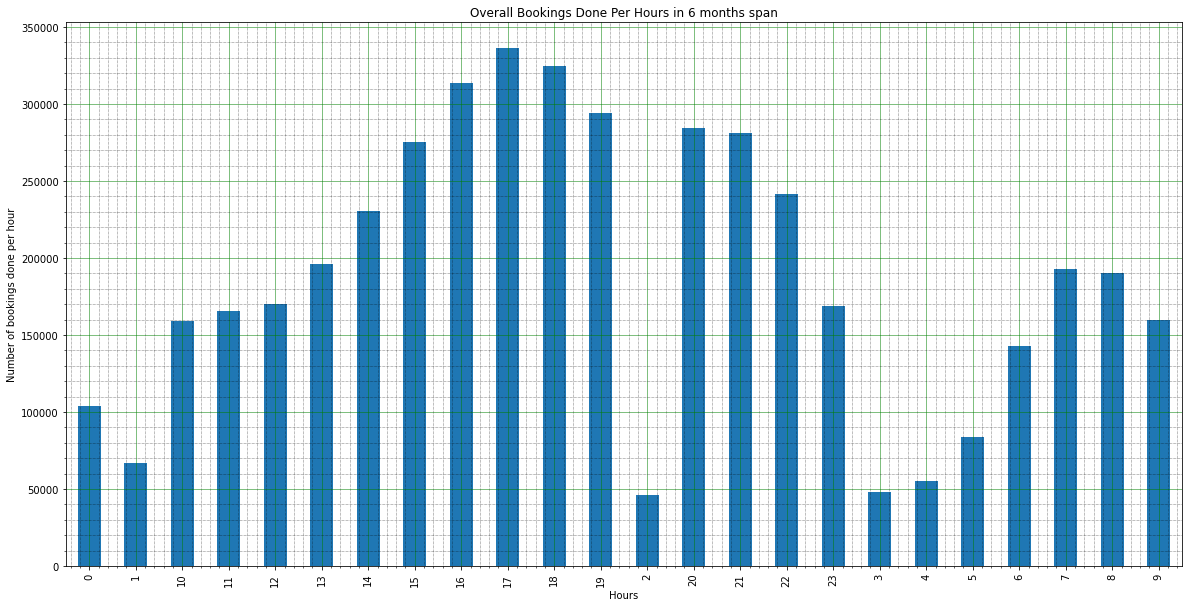

In [109]:
plt.rcParams["figure.figsize"] = (20,10)
data.groupby('Hours',sort = True)['Day'].count().plot(kind = 'bar')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Hours')
plt.ylabel('Number of bookings done per hour')
plt.title('Overall Bookings Done Per Hours in 6 months span')
plt.show()

### The above plot shows us that there were less numbers of bookings done from 00:00 to 05:00 this was expected since people travel less at mid night and dawn than day time or evening, Our one expection is clear that the plot is correct according to the general human behaviour. 

In [110]:
data['Month'] = data['Date'].apply(lambda x : x.split('/')[0])

In [111]:
data['Month'] = data['Month'].replace(['4','5','6','7','8','9'],['April','May','June','July','August','September'])

### Now we'll see the number of bookings done per hour according to the months, from this we'll able to see that which month has how much bookings in the praticular hour.

## Bookings done per hour each month

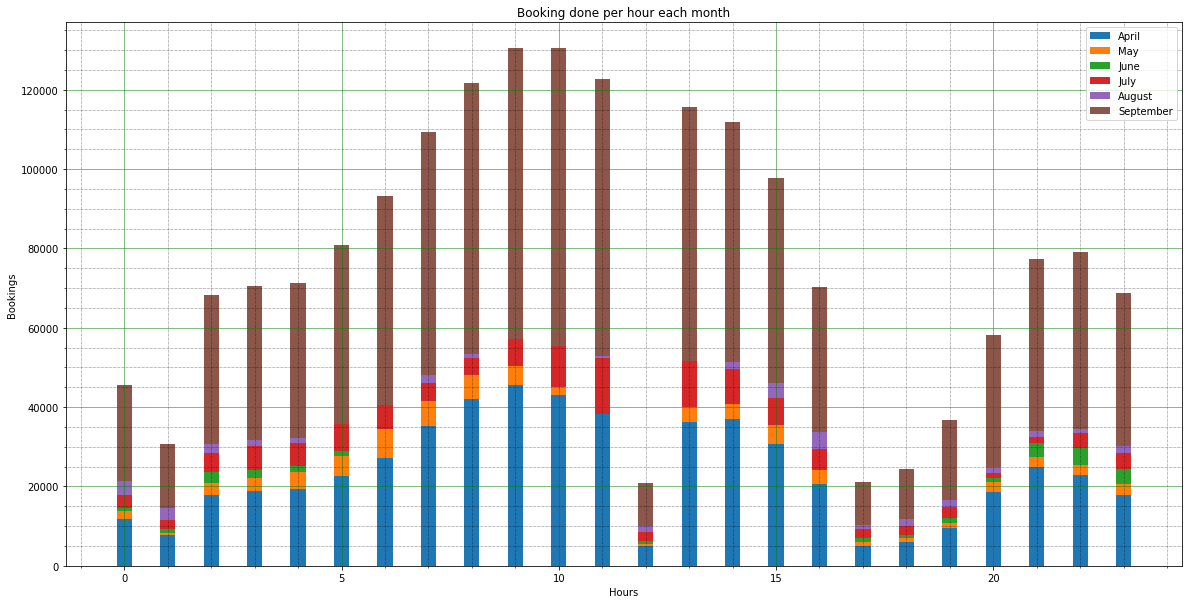

In [112]:
april = data[data['Month'] == 'April'].groupby('Hours',sort = True)['Day'].count()
may = data[data['Month'] == 'May'].groupby('Hours',sort = True)['Day'].count()
june = data[data['Month'] == 'June'].groupby('Hours',sort = True)['Day'].count()
july = data[data['Month'] == 'July'].groupby('Hours',sort = True)['Day'].count()
august = data[data['Month'] == 'August'].groupby('Hours',sort = True)['Day'].count()
september = data[data['Month'] == 'September'].groupby('Hours',sort = True)['Day'].count()

labels = list(range(0,24))
width = 0.35
fig, ax = plt.subplots()

ax.bar(labels, april, width, label='April')
ax.bar(labels, may, width, label='May',bottom=april)
ax.bar(labels, june, width, label='June',bottom = may)
ax.bar(labels, july, width, label='July',bottom = june)
ax.bar(labels, august, width, label='August',bottom = july)
ax.bar(labels, september, width, label='September',bottom = august)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.set_xlabel('Hours')
ax.set_ylabel('Bookings')
ax.set_title('Booking done per hour each month')
ax.legend()

plt.show()

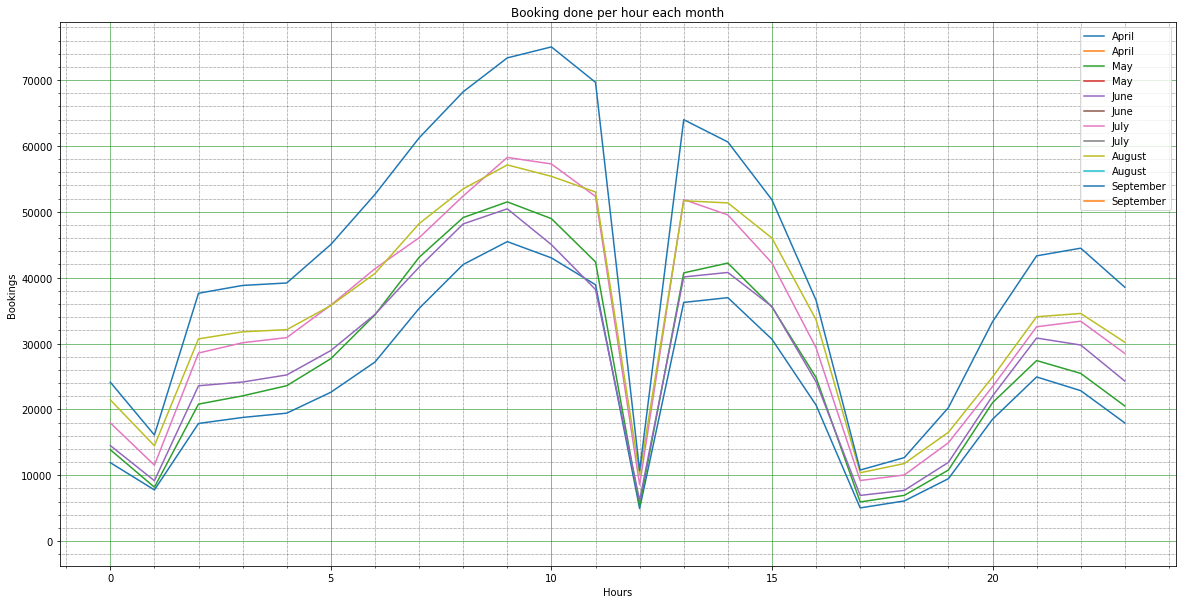

In [113]:
april = data[data['Month'] == 'April'].groupby('Hours',sort = True)['Day'].count()
may = data[data['Month'] == 'May'].groupby('Hours',sort = True)['Day'].count()
june = data[data['Month'] == 'June'].groupby('Hours',sort = True)['Day'].count()
july = data[data['Month'] == 'July'].groupby('Hours',sort = True)['Day'].count()
august = data[data['Month'] == 'August'].groupby('Hours',sort = True)['Day'].count()
september = data[data['Month'] == 'September'].groupby('Hours',sort = True)['Day'].count()

labels = list(range(0,24))
width = 0.35
fig, ax = plt.subplots()

ax.plot(labels, april, width, label='April')
ax.plot(labels, may, width, label='May')
ax.plot(labels, june, width, label='June')
ax.plot(labels, july, width, label='July')
ax.plot(labels, august, width, label='August')
ax.plot(labels, september, width, label='September')
ax.legend()
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.set_xlabel('Hours')
ax.set_ylabel('Bookings')
ax.set_title('Booking done per hour each month')


plt.show()

### The above plot very well shows that September has the most amount of bookings and june and august has the least number of bookings in june there is almost no bookings around evening and early nights.

## Trips per day

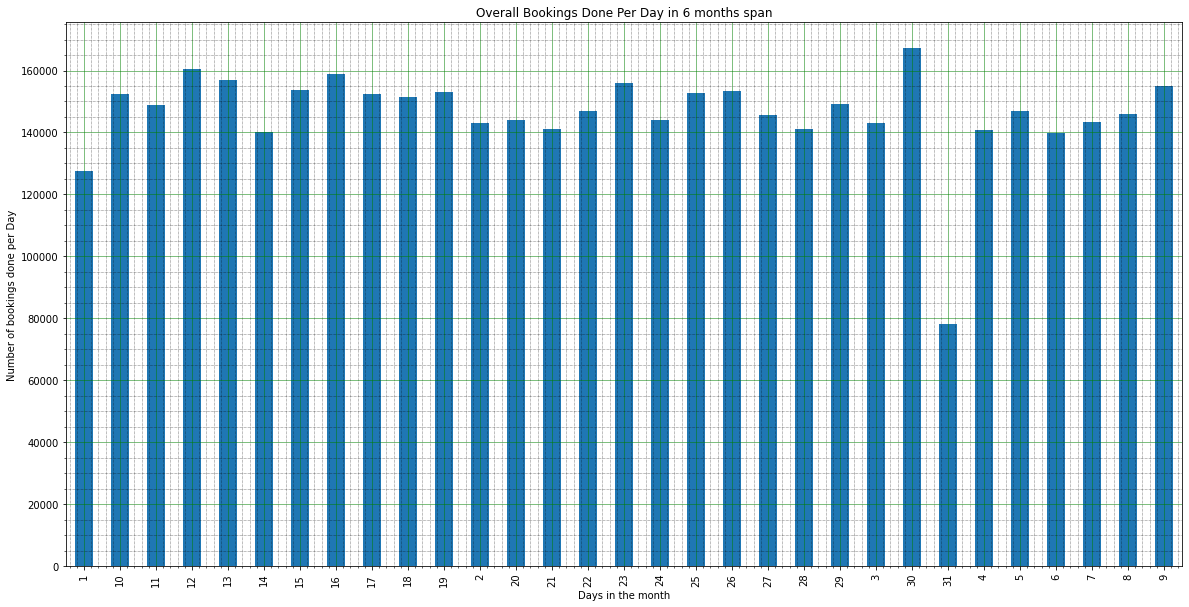

In [114]:
plt.rcParams["figure.figsize"] = (20,10)
data.groupby('Day',sort = True)['Hours'].count().plot(kind = 'bar')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Days in the month')
plt.ylabel('Number of bookings done per Day')
plt.title('Overall Bookings Done Per Day in 6 months span')
plt.show()

In [115]:
data['Week Day'] = pd.to_datetime(data['Date/Time']).dt.day_name()

### Now we'll see the bookings done per day of the week in each month.

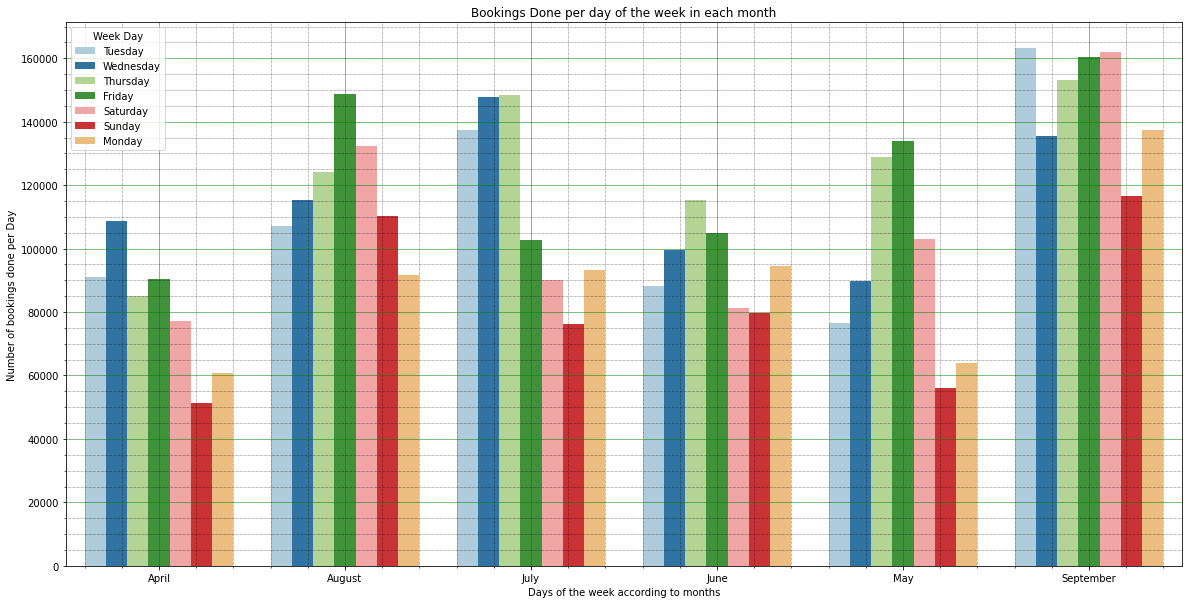

In [116]:
plt.rcParams["figure.figsize"] = (20,10)
sns.countplot(x = 'Month', hue = 'Week Day', data = data, palette='Paired')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Days of the week according to months')
plt.ylabel('Number of bookings done per Day')
plt.title('Bookings Done per day of the week in each month')
plt.show()

## Number of bookings done per bases

### From the following codes we can see that Base B02617 has the highes number of bookings followed by B02598 and B02682.

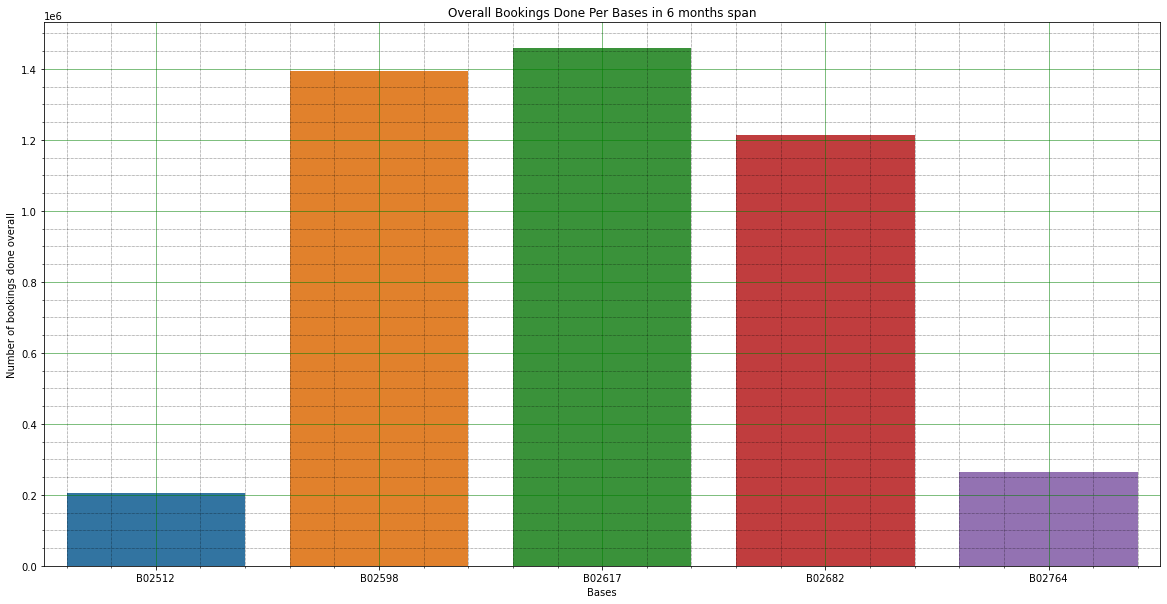

In [117]:
sns.countplot(data['Base'])
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Bases')
plt.ylabel('Number of bookings done overall')
plt.title('Overall Bookings Done Per Bases in 6 months span')
plt.show()

## Number of bookings done per hour each base

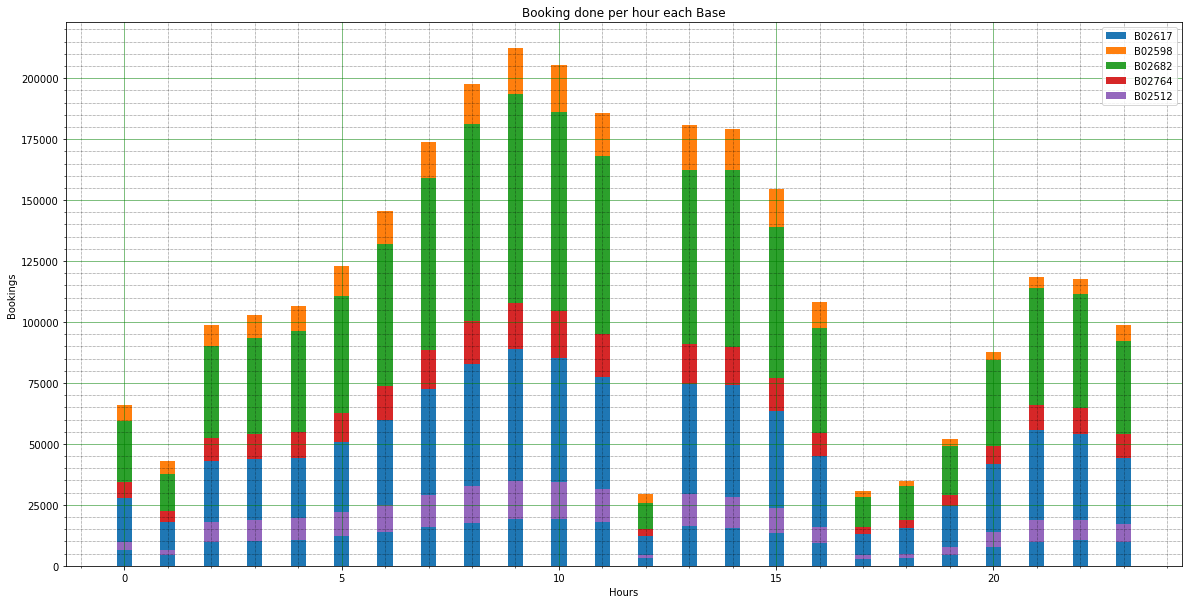

In [118]:
B02617 = data[data['Base'] == 'B02617'].groupby('Hours',sort = True)['Day'].count()
B02598 = data[data['Base'] == 'B02598'].groupby('Hours',sort = True)['Day'].count()
B02682 = data[data['Base'] == 'B02682'].groupby('Hours',sort = True)['Day'].count()
B02764 = data[data['Base'] == 'B02764'].groupby('Hours',sort = True)['Day'].count()
B02512 = data[data['Base'] == 'B02512'].groupby('Hours',sort = True)['Day'].count()

labels = list(range(0,24))
width = 0.35
fig, ax = plt.subplots()

ax.bar(labels, B02617, width, label='B02617')
ax.bar(labels, B02598, width, label='B02598',bottom=B02617)
ax.bar(labels, B02682, width, label='B02682',bottom = B02598)
ax.bar(labels, B02764, width, label='B02764',bottom = B02682)
ax.bar(labels, B02512, width, label='B02512',bottom = B02764)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.set_xlabel('Hours')
ax.set_ylabel('Bookings')
ax.set_title('Booking done per hour each Base')
ax.legend()

plt.show()

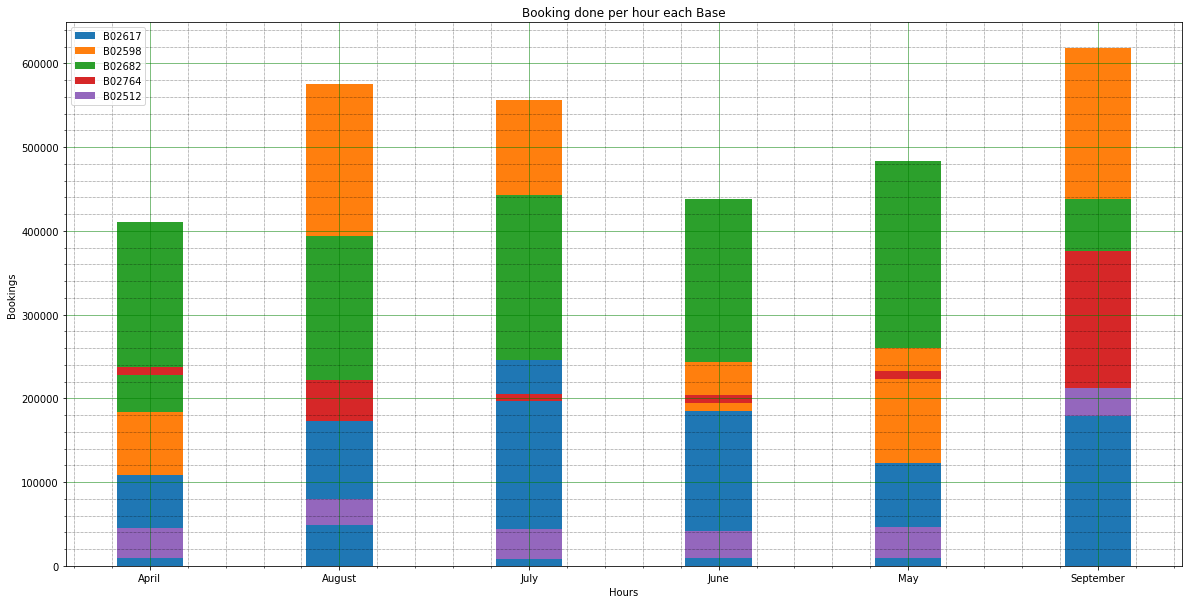

In [119]:
B02617 = data[data['Base'] == 'B02617'].groupby('Month',sort = True)['Day'].count()
B02598 = data[data['Base'] == 'B02598'].groupby('Month',sort = True)['Day'].count()
B02682 = data[data['Base'] == 'B02682'].groupby('Month',sort = True)['Day'].count()
B02764 = data[data['Base'] == 'B02764'].groupby('Month',sort = True)['Day'].count()
B02512 = data[data['Base'] == 'B02512'].groupby('Month',sort = True)['Day'].count()

labels = ['April','August','July','June','May','September']
width = 0.35
fig, ax = plt.subplots()

ax.bar(labels, B02617, width, label='B02617')
ax.bar(labels, B02598, width, label='B02598',bottom=B02617)
ax.bar(labels, B02682, width, label='B02682',bottom = B02598)
ax.bar(labels, B02764, width, label='B02764',bottom = B02682)
ax.bar(labels, B02512, width, label='B02512',bottom = B02764)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.set_xlabel('Hours')
ax.set_ylabel('Bookings')
ax.set_title('Booking done per hour each Base')
ax.legend()

plt.show()

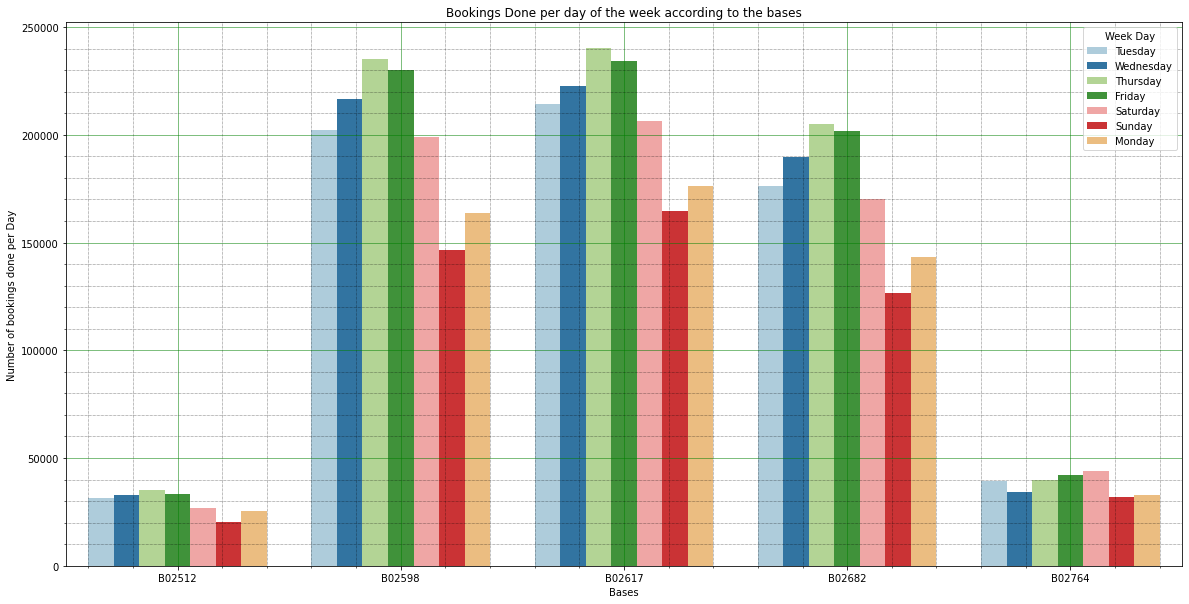

In [120]:
plt.rcParams["figure.figsize"] = (20,10)
sns.countplot(x = 'Base', hue = 'Week Day', data = data, palette='Paired')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Bases')
plt.ylabel('Number of bookings done per Day')
plt.title('Bookings Done per day of the week according to the bases')
plt.show()

## Heat Map Visualization for number of bookings done.

### By Hour and Day

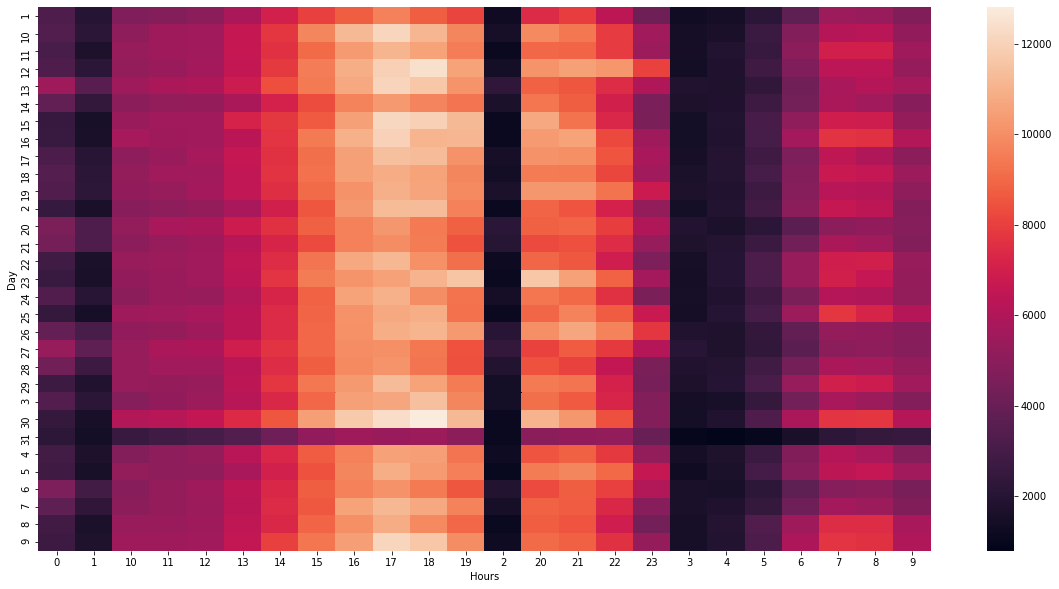

In [121]:
data.groupby(['Day','Hours'], as_index=False).count()
sns.heatmap(data[['Day','Hours','Month']].pivot_table(values='Month',index='Day',columns='Hours',aggfunc='count'))

### By month and day

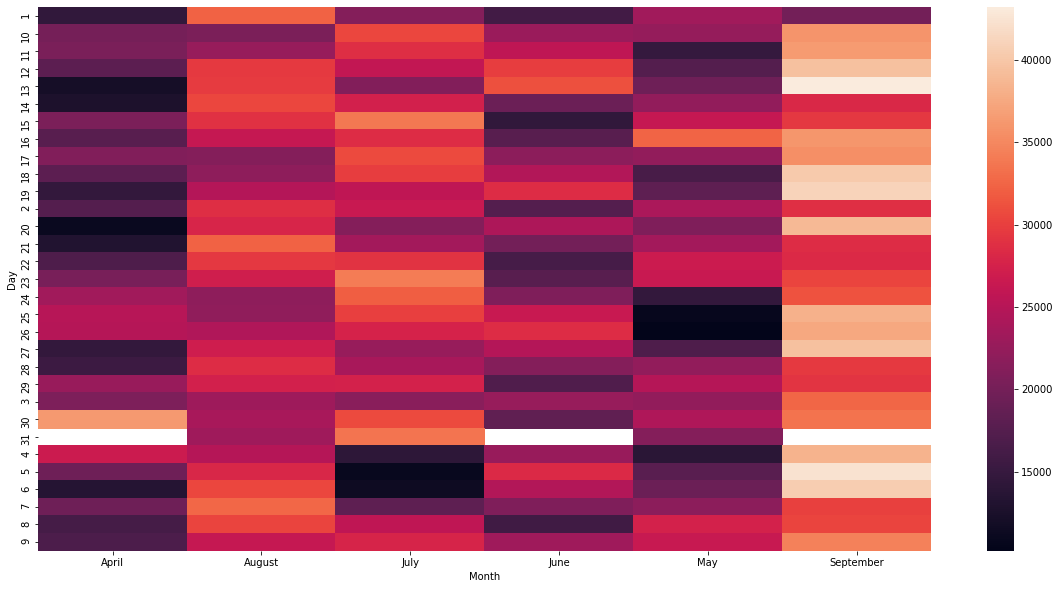

In [122]:
data.groupby(['Month','Day'], as_index=False).count()
sns.heatmap(data[['Day','Hours','Month']].pivot_table(values='Hours',index='Day',columns='Month',aggfunc='count'))

## By month and Day of the week

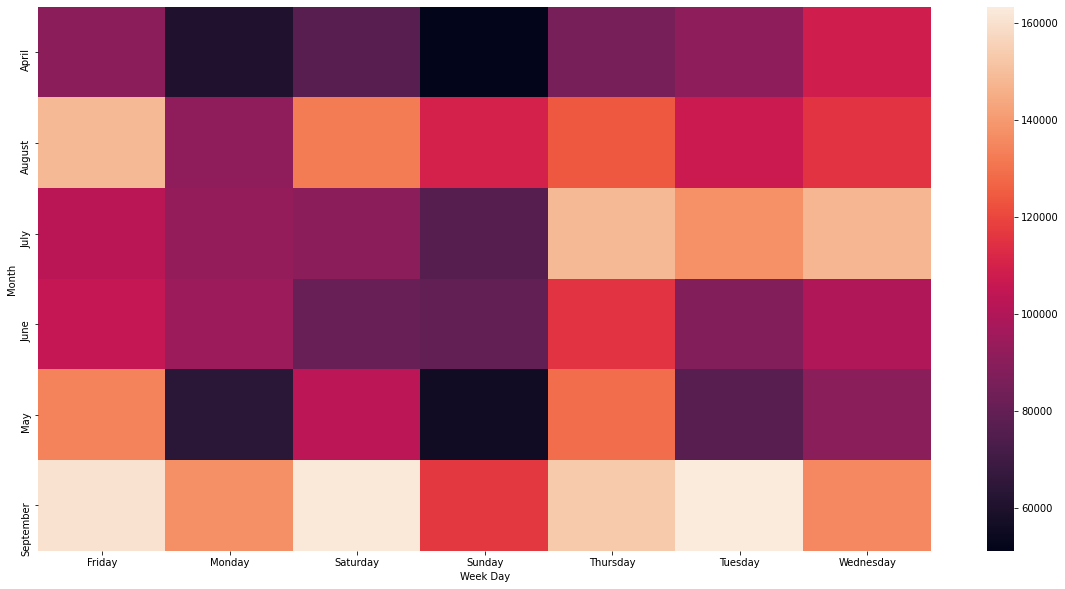

In [123]:
data.groupby(['Week Day','Month'], as_index=False).count()
sns.heatmap(data[['Week Day','Hours','Month']].pivot_table(values='Hours',index='Month',columns='Week Day',aggfunc='count'))

## By Month and Bases

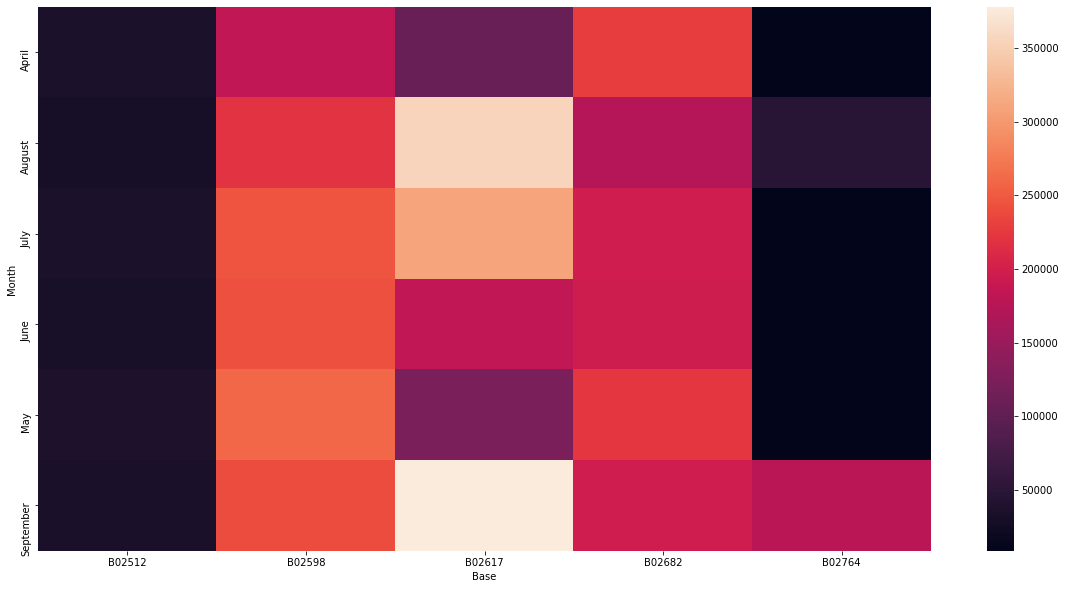

In [124]:
data.groupby(['Base','Month'], as_index=False).count()
sns.heatmap(data[['Week Day','Base','Month']].pivot_table(values='Week Day',index='Month',columns='Base',aggfunc='count'))

## By week day and bases

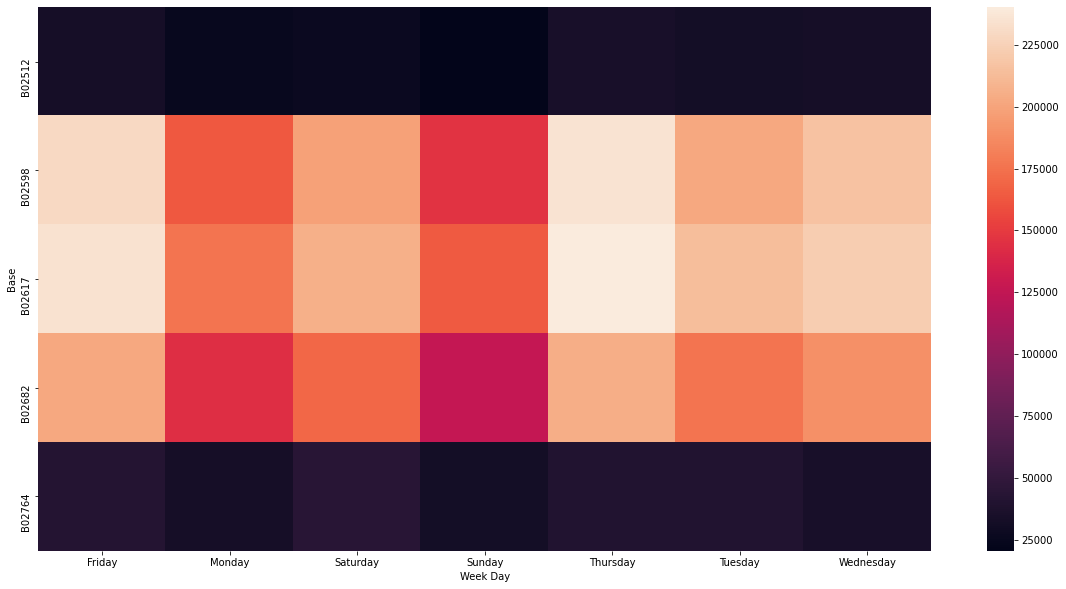

In [125]:
data.groupby(['Base','Week Day'], as_index=False).count()
sns.heatmap(data[['Week Day','Base','Month']].pivot_table(values='Month',index='Base',columns='Week Day',aggfunc='count'))

## Trips location on newyork city map

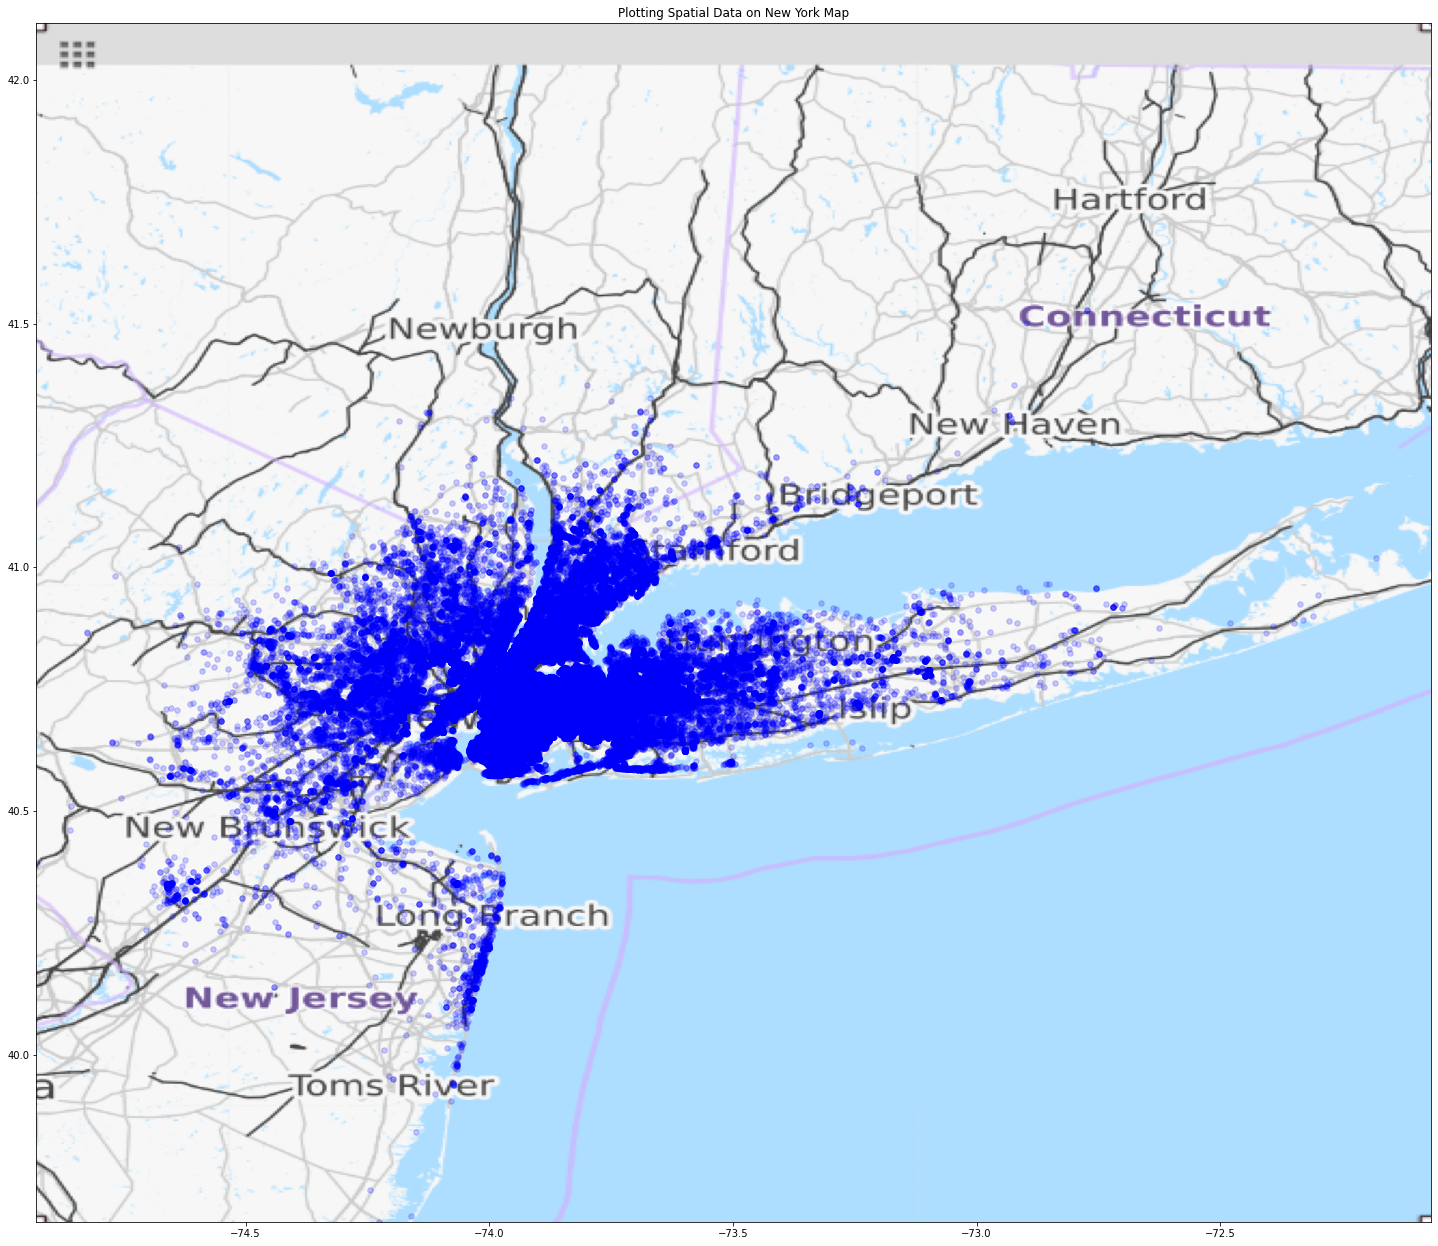

In [149]:
newyork = plt.imread('Export _ OpenStreetMap and 7 more pages - Personal - Microsoft​ Edge 9_4_2020 10_35_30 PM.png')
BBox = (data.Lon.min(), data.Lon.max(), data.Lat.min(), data.Lat.max())
fig, ax = plt.subplots(figsize = (25,25))
ax.scatter(data.Lon, data.Lat, zorder=1, alpha= 0.2, c='b', s=30)
ax.set_title('Plotting Spatial Data on New York Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(newyork, zorder=0, extent = BBox, aspect= 'equal')

## Locations of bookings according to the bases

Text(0.5, 1.0, 'Locations of bookings according to bases')

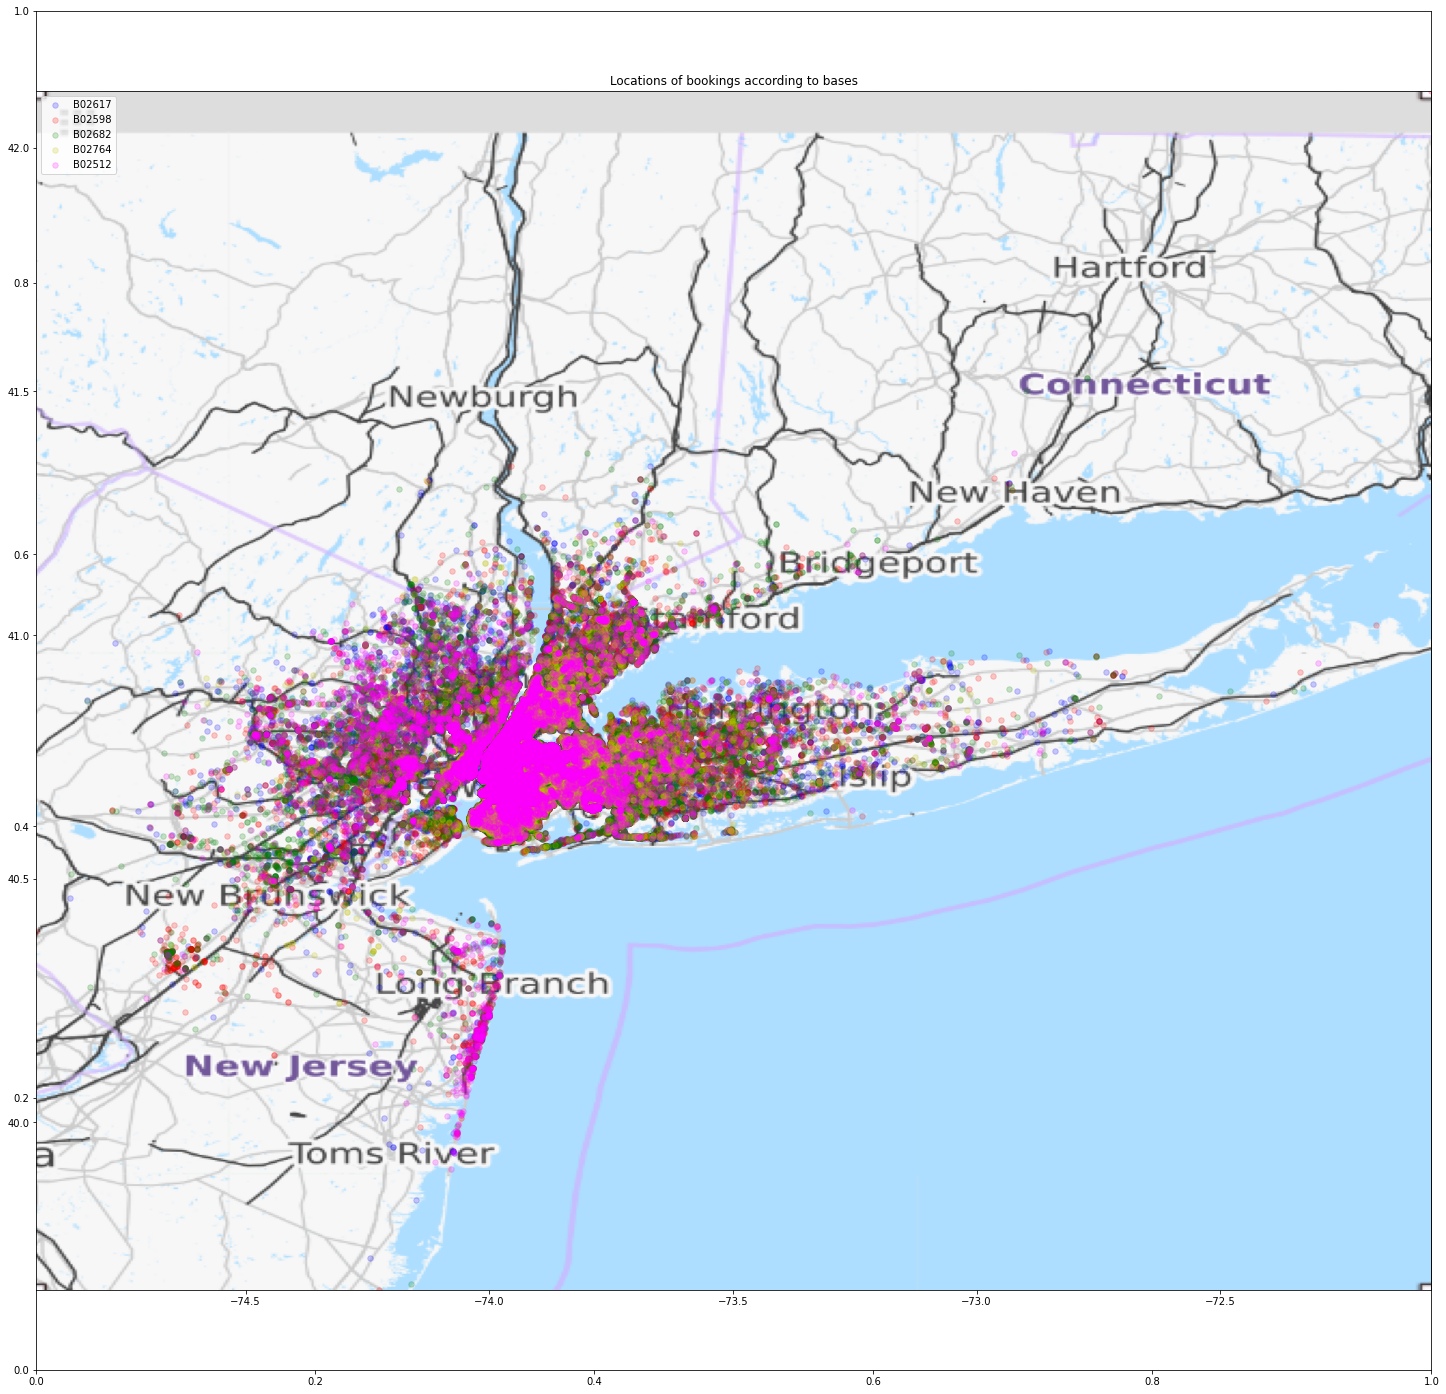

In [156]:
newyork = plt.imread('Export _ OpenStreetMap and 7 more pages - Personal - Microsoft​ Edge 9_4_2020 10_35_30 PM.png')
BBox = (data.Lon.min(), data.Lon.max(), data.Lat.min(), data.Lat.max())
fig, ax = plt.subplots(figsize = (25,25))
ax1 = fig.add_subplot()
ax1.scatter(data.Lon[data.Base == 'B02617'], data.Lat[data.Base == 'B02617'], zorder=1, alpha= 0.2, c='b', s=30,label = 'B02617')
ax1.scatter(data.Lon[data.Base == 'B02598'], data.Lat[data.Base == 'B02598'], zorder=1, alpha= 0.2, c='r', s=30,label = 'B02598')
ax1.scatter(data.Lon[data.Base == 'B02682'], data.Lat[data.Base == 'B02682'], zorder=1, alpha= 0.2, c='g', s=30,label = 'B02682')
ax1.scatter(data.Lon[data.Base == 'B02764'], data.Lat[data.Base == 'B02764'], zorder=1, alpha= 0.2, c='y', s=30,label = 'B02764')
ax1.scatter(data.Lon[data.Base == 'B02512'], data.Lat[data.Base == 'B02512'], zorder=1, alpha= 0.2, c='magenta', s=30,label = 'B02512')
ax1.set_title('Plotting Spatial Data on New York Map')
ax1.set_xlim(BBox[0],BBox[1])
ax1.set_ylim(BBox[2],BBox[3])
ax1.imshow(newyork, zorder=0, extent = BBox, aspect= 'equal')
ax1.legend(loc = 'upper left')
ax1.set_title('Locations of bookings according to bases')

In [154]:
data.Lon[data.Lon == 'B02617']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Series([], Name: Lon, dtype: float64)